# Electron Diffraction
## Justin Houle , Liam Patterson

# Abstract


# Introduction


# Methods and Setup
 

Populating the interactive namespace from numpy and matplotlib


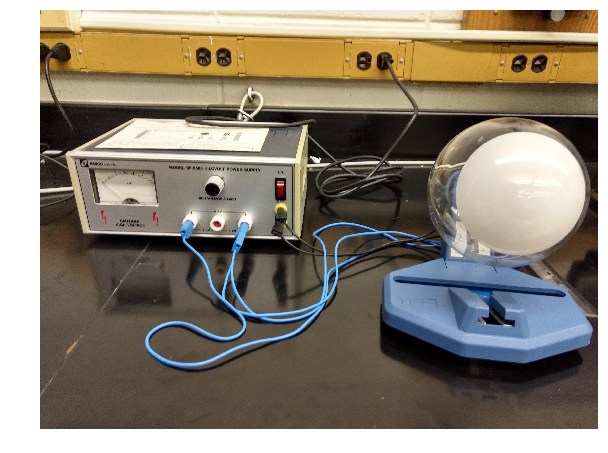

Lab Equipment


In [10]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('electron_diffraction_lab_eqp.jpg')
plt.figure(figsize=(10,10))
plt.axis('off')
imgplot = plt.imshow(img)
plt.show()

print("Lab Equipment")

Populating the interactive namespace from numpy and matplotlib


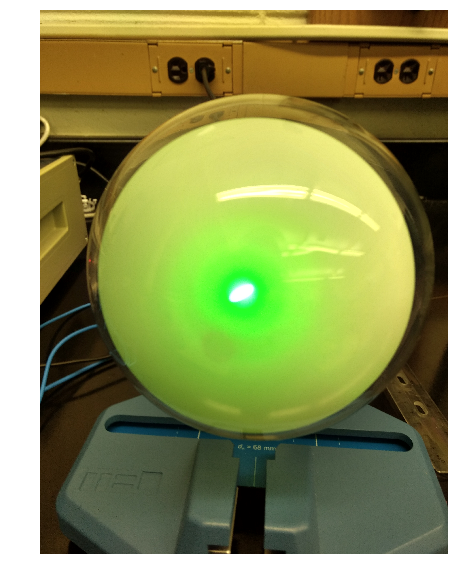

Light up bulb with rings of light


In [11]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('electron_diffraction_bulb.jpg')
plt.figure(figsize=(10,10))
plt.axis('off')
imgplot = plt.imshow(img)
plt.show()

print("Light up bulb with rings of light")

# Data and Calculations

We start with this equation for de Broglie's wavelength

\begin{equation}
\lambda = (\frac{150}{V_a})^\frac{1}{2}
\end{equation}

Where Va is in Volts and lambda is in angstroms

If the beam travels a distance through an angle, the diameter of the ring is

\begin{equation}
D = 2L\theta
\end{equation}

Where L is the distance from the source to the edge of the lamp (13.5cm for our apparatus) and theta is the angle

For small angles we get

\begin{equation}
\lambda = d\theta
\end{equation}

After a bit of substitution we get 

\begin{equation}
\lambda = \frac{Dd}{2L}
\end{equation}

This equation equals the original equation for de Broglie's wavelength,  so we get

\begin{equation}
(\frac{150}{V_a})^\frac{1}{2} = \frac{Dd}{2L}
\end{equation}

Solving for d, the diffraction spacing, gets us

\begin{equation}
d = \frac{2L}{D} (\frac{150}{V_a})^\frac{1}{2}
\end{equation}

By graphing d vs Va^-1/2, we get the slope of the graph to equal d*Va^1/2, so this alters our equation to

\begin{equation}
d = \frac{2L*150^\frac{1}{2}}{slope}
\end{equation}

In [3]:
import math
import astropy.units as u
from astropy.io import ascii
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

In [33]:
data = ascii.read('ElectronDiffraction.csv', 'r')
data

kVa,Voltage,D inner 1,D outer 1,D inner 2,D outer 2,D inner avg,D outer avg
float64,int32,float64,float64,float64,float64,float64,float64
3.5,3500,2.8,5.0,2.7,4.6,2.75,4.8
4.0,4000,2.6,3.8,2.7,4.6,2.65,4.2
4.5,4500,2.3,3.4,2.3,3.7,2.3,3.55
5.0,5000,2.2,3.2,2.4,3.8,2.3,3.5
5.5,5500,2.0,3.2,2.0,3.4,2.0,3.3


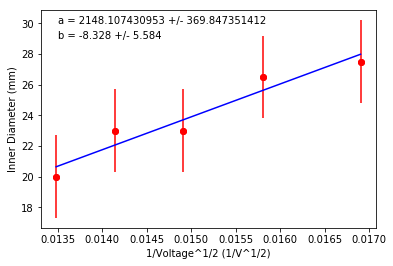

In [34]:
#Graph for Inner Diameter
data = ascii.read('ElectronDiffraction.csv', 'r')

#defining variables and std deviation
y = data['D inner avg'] * 10 #cm to mm
x = data['Voltage']**(-1/2)
sdev=np.std(y)

#defining function and trendline
def func(x, a, b):
    return a*x + b

popt1, pcov1 = curve_fit(func, x, y, absolute_sigma=sdev)

#creating plot
plt.plot(x, y, 'ro')
plt.plot(x, np.polyval(popt1, x), 'b')
plt.errorbar(x, y, yerr=sdev, fmt='ro')
plt.text(0.0135, 30, r"a = {0:.9f} +/- {1:.9f}".format(popt1[0], pcov1[0,0]**0.5))
plt.text(0.0135, 29, r"b = {0:.3f} +/- {1:.3f}".format(popt1[1], pcov1[1,1]**0.5))
plt.xlabel("1/Voltage^1/2 (1/V^1/2)")
plt.ylabel("Inner Diameter (mm)")
plt.show()

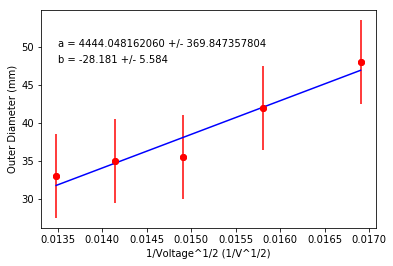

In [35]:
#Graph for Outer Diameter
data = ascii.read('ElectronDiffraction.csv', 'r')

#defining variables and std deviation
y = data['D outer avg'] * 10 #cm to mm
x = data['Voltage']**(-1/2)
sdev=np.std(y)

#defining function and trendline
def func(x, a, b):
    return a*x + b

popt2, pcov2 = curve_fit(func, x, y, absolute_sigma=sdev)

#creating plot
plt.plot(x, y, 'ro')
plt.plot(x, np.polyval(popt2, x), 'b')
plt.errorbar(x, y, yerr=sdev, fmt='ro')
plt.text(0.0135, 50, r"a = {0:.9f} +/- {1:.9f}".format(popt2[0], pcov2[0,0]**0.5))
plt.text(0.0135, 48, r"b = {0:.3f} +/- {1:.3f}".format(popt2[1], pcov2[1,1]**0.5))
plt.xlabel("1/Voltage^1/2 (1/V^1/2)")
plt.ylabel("Outer Diameter (mm)")
plt.show()

In [40]:
#Finding values for the spacings
L=135
slope_i=popt2[0]
slope_o=popt1[0]

D_inner = (2*L*math.sqrt(150))/slope_i
D_outer = (2*L*math.sqrt(150))/slope_o

percent_error_inner = (abs(1.23-D_inner)/1.23)*100
percent_error_outer = (abs(2.13-D_outer)/2.13)*100

print(D_inner, "Angstroms - Inner Diameter")
print(D_outer, "Angstroms - Outer Diameter")
print(percent_error_inner, "% - Percent Error Inner Diameter")
print(percent_error_outer, "% - Percent Error Outer Diameter")

0.744098855856 Angstroms - Inner Diameter
1.53940678437 Angstroms - Outer Diameter
39.5041580605 % - Percent Error Inner Diameter
27.7273810157 % - Percent Error Outer Diameter


# Conclusions

The purpose of this lab was to use the electron diffraction apparatus to find the spacing between hexagonal diffracting planes by measuring the diameters of the inner and outer rings on the displayed on the lamp with varying voltages. We found the inner asnd outer diameters of 5 different values for voltage. After plotting and plugging into the equations, we recieved an inner spacing value of 0.744 Angstroms and an outer spacing value of 1.539 Angstroms. Our inner value is a 39.5% error from the accepted inner spacing value of 1.23 A and our outer value is a 27.7% error from the acepted inner spacing value of 2.13 A. This percent error could be due to the lack of data points. We only took data 5 points and should've took more, but we took 2 different trials per voltage and took the average value of these diameters. Also, our apparatus was making a loud, high pitched noise the higher we turned up the voltage, so we decided to not go over 5.5kV, for the fear that the apparatus was faulty and may break. Measuring the diameters was quick difficult due to the lines being hard to see (even with the lights turned off), so this could've also effected our values for diameter.

# References

The electron diffraction ratio lab handout